# **1st DNN for assignment 5**

**Task**

* Change the code 8 or your own 4th Code from Assignment 4 to include:
  1. image normalization
  2. L2 regularization
  3. ReLU after BN

* Run your new code for 40 epochs and save the model with highest validation accuracy
* Find out 25 misclassified images from the validation dataset and create an image gallery
* Submit
 

**This is version 1 for code picked from previous assignemt's last version  **

Version 1: Adding Inage Normalization
Version 2 L2 Reg
Version 3 Relu after BN
Version 4 Tuning and saving model for highers accuracy
Version 5 Finding 25 missclassified images


*Result*




installing and Importing Keras for current solution

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Importing Numpy and Keras modules as well as mnist data set.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

Loading mnist data set in train and test variables.

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Ploting sample from train data set.

(60000, 28, 28)


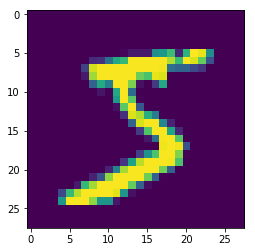

In [30]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Reshaping all train and test data to a uniform size.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Regularizing train and test data for float data type and division wiht 255

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Visualizing train out put

In [33]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Viewing tranformed train out put matrix

In [35]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Adding Image normalization

In [53]:
# standardizing a image dataset
from keras.preprocessing.image import ImageDataGenerator

'''
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))
'''

# report pixel means and standard deviations
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (X_train.mean(), X_train.std(), X_test.mean(), Y_test.std()))
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate the mean on the training dataset
datagen.fit(X_train)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))
# demonstrate effect on a single batch of samples
train_iterator = datagen.flow(X_train, Y_train, batch_size=64)

# get batch iterator for validation
validation_generator = datagen.flow(X_test, Y_test)


# get a batch
batchX, batchy = train_iterator.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())
# demonstrate effect on entire training dataset
train_iterator1 = datagen.flow(X_train, Y_train, batch_size=len(X_train), shuffle=False)
# get a batch
batchX, batchy = train_iterator1.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

Statistics train=0.131 (0.308), test=0.133 (0.300)
Data Generator mean=0.131, std=0.308
(64, 28, 28, 1) 0.022442447 1.024061
(60000, 28, 28, 1) -4.9324944e-07 0.9999959


Carrying model arch from Assignment 4

In [54]:
from keras.layers import Activation, BatchNormalization
model = Sequential()

#Vanilla
''' 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
'''

#1st version 
'''
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 26,26 #RF 3X3
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 24,24 #RF 7X7
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 22,22 #RF 9X9
model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 20,20 #RF 11X11
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 18,18 #RF 13X13
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 16,16 #RF 15X15
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 14,14 #RF 17X17
model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(Convolution2D(4, 3, 3, activation='relu')) #input 12,12 #RF 19X19
model.add(BatchNormalization())

model.add(Convolution2D(10, 1)) #input 10,10 
model.add(BatchNormalization())

model.add(Convolution2D(10, 10)) #input 10,10
'''

#2nd version 
'''
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) #input 26,26 #RF 3X3
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) #input 24,24 #RF 7X7
model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2, 2))) #input 22,22 #RF 14X14
model.add(Convolution2D(8, 3, 3, activation='relu')) #input 11,11 #RF 16X16
model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(Convolution2D(10, 1, activation='relu')) #input 9,9
model.add(Convolution2D(10, 9)) #input 9X9
'''

#3rd version 
''''''
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(Convolution2D(16, 3, 3, activation='relu')) #input 26,26 #RF 3X3
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) #input 24,24 #RF 6X6

model.add(Convolution2D(12, 3, 3, activation='relu')) #input 12,12 #RF 8X8
model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(Convolution2D(10, 1, activation='relu')) #input 10,10
model.add(Convolution2D(10, 10)) #input 10,10


model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:75: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`


Printing model summary to understand current paramaters for the model. 

In [55]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_10 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_7 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_11 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 10, 10, 12)        1740      
__________

Setting model's compile environment with loss function, optimizer and matrics.

In [0]:
from keras.optimizers import Adam, SGD
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.01 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.01),
             metrics=['accuracy'])

Training model for 50 epoch for 128 batch size
Replacing training images with batchX

In [57]:
#history = model.fit(X_train, Y_train, batch_size=128, nb_epoch=50, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])


#Fit gen for normalized image gen 

history = model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=50, callbacks=[LearningRateScheduler(scheduler, verbose=1)], verbose=1, validation_data=validation_generator,
        validation_steps=800)

Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
938/938 [==============================] - 12s 12ms/step - loss: 0.1385 - acc: 0.9577 - val_loss: 0.0501 - val_acc: 0.9843
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0075815011.
938/938 [==============================] - 10s 11ms/step - loss: 0.0605 - acc: 0.9808 - val_loss: 0.0389 - val_acc: 0.9870
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0061050061.
938/938 [==============================] - 11s 12ms/step - loss: 0.0474 - acc: 0.9849 - val_loss: 0.0365 - val_acc: 0.9876
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.005109862.
938/938 [==============================] - 10s 11ms/step - loss: 0.0403 - acc: 0.9874 - val_loss: 0.0395 - val_acc: 0.9868
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0043936731.
938/938 [==============================] - 10s 11ms/step - loss: 0.0370 - acc: 0.9880 -

Plotting training and validation accuracty as well as loss for every epoch

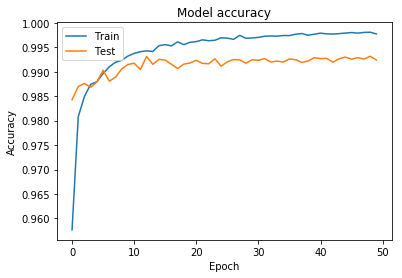

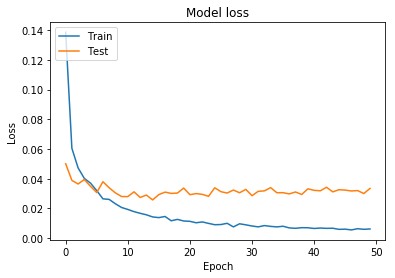

In [58]:
import matplotlib.pyplot as plt

#history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Evaluating model and storing score in a variable.

In [0]:
#score = model.evaluate(X_test, Y_test, verbose=0)
score = model.evaluate_generator(validation_generator, steps=len(validation_generator), verbose=0)

Printing loss and accuracy of model test done in last step

In [65]:
print(score)

[0.031935828762586604, 0.993]


Predicting out put for test inputs

In [0]:
y_pred = model.predict(X_test)

Printing prediction and test out puts 

In [67]:
print(y_pred[:9])
print(y_test[:9])

[[1.8994661e-09 2.7205772e-18 5.0971709e-04 6.7702658e-13 7.9226325e-08
  1.3026211e-11 5.9631149e-09 3.3183226e-12 9.9947637e-01 1.3858690e-05]
 [4.2642478e-05 2.7794422e-14 4.2387308e-03 1.7574868e-12 2.6051040e-07
  6.8195124e-13 1.3419958e-03 3.4531668e-13 9.9437642e-01 2.2990979e-10]
 [9.9994475e-09 4.7611330e-16 5.1763209e-06 7.5384093e-17 4.6675259e-04
  9.0992569e-12 2.6461126e-07 7.1974275e-17 9.9952745e-01 4.0323243e-07]
 [9.2074746e-01 1.5187742e-15 2.7254533e-02 4.4060186e-10 2.4238792e-05
  7.5027106e-07 1.8947417e-03 4.5336822e-13 4.9875207e-02 2.0303526e-04]
 [3.4732039e-07 3.9927604e-20 4.3407995e-06 3.9728975e-15 2.1488322e-05
  8.9994401e-12 2.4825162e-05 2.8804742e-15 9.9994862e-01 4.1619663e-07]
 [4.5228425e-08 1.7351090e-15 6.4694039e-05 3.1260684e-17 4.4893072e-04
  9.2723424e-12 3.3208601e-06 8.4780849e-15 9.9948043e-01 2.5757804e-06]
 [3.9278811e-09 2.7661071e-18 1.2612057e-05 3.4272798e-16 1.7994957e-05
  1.0797573e-11 4.8094687e-08 1.0230679e-15 9.9996734e-01 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_2'):  
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()